# Clustering (KMeans)


## Import Libraries

In [25]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set the environment variable to avoid the memory leak warning
os.environ['OMP_NUM_THREADS'] = '1'

# Set up Seaborn style for better aesthetics
sns.set(style="whitegrid")

## Load and Explore the Dataset

In [27]:
# Load the Iris dataset
from sklearn.datasets import load_iris
data = load_iris()

# Create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Display the first few rows of the dataset
print(df.head())

# Basic statistics of the dataset
print(df.describe())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000

## Preprocess the Data

In [29]:
# Standardize the features (mean = 0, variance = 1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# Convert the scaled features back to a DataFrame for ease of use
scaled_df = pd.DataFrame(scaled_features, columns=df.columns)

# Display the first few rows of the standardized dataset
print(scaled_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


## Determine the Optimal Number of Clusters Using the Elbow Method

C:\Users\areeb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\areeb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\areeb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\areeb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

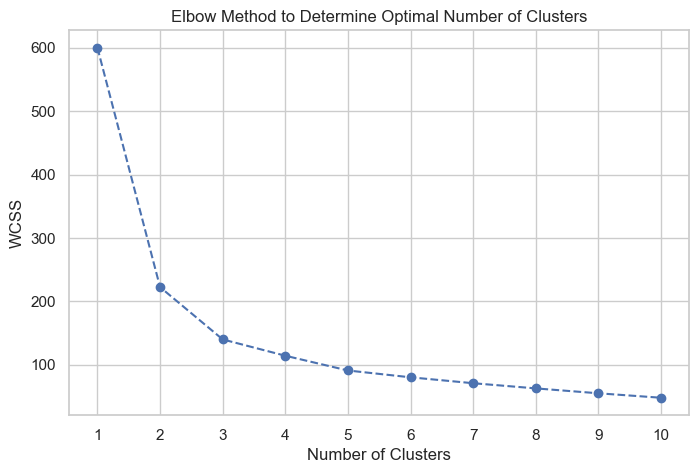

In [44]:
# Import the necessary library
from sklearn.cluster import KMeans

# List to hold the Within-Cluster Sum of Squares (WCSS) values
wcss = []

# Calculate WCSS for different number of clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42) # Now KMeans is defined
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.show()

## Apply KMeans with the Optimal Number of Clusters

In [36]:
# From the Elbow Method, assume the optimal number of clusters is 3
optimal_clusters = 3

# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(scaled_df)

# Add the cluster results to the original DataFrame
df['Cluster'] = y_kmeans

# Display the first few rows with the cluster labels
print(df.head())

C:\Users\areeb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


## Visualize the Clusters

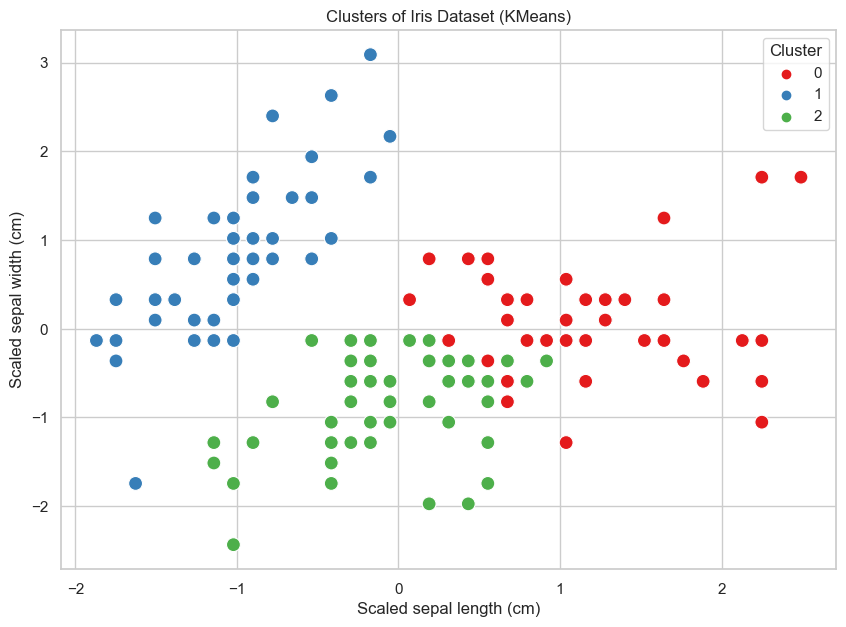

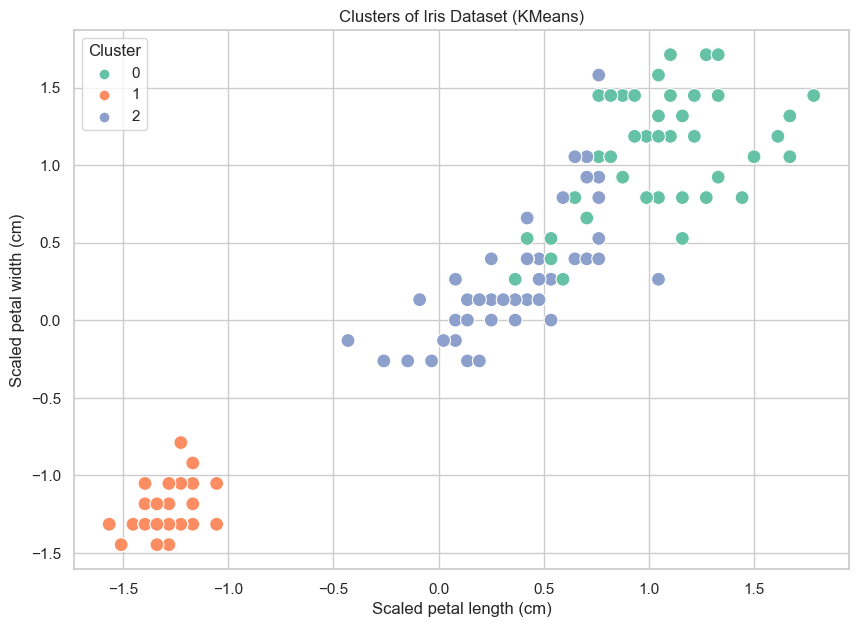

In [39]:
# Visualizing the clusters in the first two dimensions
plt.figure(figsize=(10, 7))
sns.scatterplot(x=scaled_df.iloc[:, 0], y=scaled_df.iloc[:, 1], hue=df['Cluster'], palette='Set1', s=100)
plt.title('Clusters of Iris Dataset (KMeans)')
plt.xlabel('Scaled ' + df.columns[0])
plt.ylabel('Scaled ' + df.columns[1])
plt.legend(title='Cluster')
plt.show()

# Visualizing the clusters in the third and fourth dimensions
plt.figure(figsize=(10, 7))
sns.scatterplot(x=scaled_df.iloc[:, 2], y=scaled_df.iloc[:, 3], hue=df['Cluster'], palette='Set2', s=100)
plt.title('Clusters of Iris Dataset (KMeans)')
plt.xlabel('Scaled ' + df.columns[2])
plt.ylabel('Scaled ' + df.columns[3])
plt.legend(title='Cluster')
plt.show()

## Evaluate the Clustering

In [42]:
# Evaluate the clustering by checking the cluster centers
print("Cluster Centers (Scaled):")
print(kmeans.cluster_centers_)

# Inverse transform to get cluster centers in the original scale
original_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("\nCluster Centers (Original Scale):")
print(pd.DataFrame(original_centers, columns=df.columns[:-1]))

# Count the number of points in each cluster
print("\nNumber of points in each cluster:")
print(df['Cluster'].value_counts())

Cluster Centers (Scaled):
[[ 1.13597027  0.08842168  0.99615451  1.01752612]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [-0.05021989 -0.88337647  0.34773781  0.2815273 ]]

Cluster Centers (Original Scale):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           6.780851          3.095745           5.510638          1.972340
1           5.006000          3.428000           1.462000          0.246000
2           5.801887          2.673585           4.369811          1.413208

Number of points in each cluster:
Cluster
2    53
1    50
0    47
Name: count, dtype: int64
